In [21]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
import time
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [23]:
num_train = 49000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

In [24]:
best_model = None
best_acc = 0

learning_rate = 1e-3
weight_scale = 1e-2
reg = 1e-2

solvers = {}

for update_rule in ['adagrad', 'nesterov_momentum', 'adamopt', 'sgd', 'sgd_momentum', 'rmsprop', 'adam']:
    print('running with ', update_rule)
    model = FullyConnectedNet([256, 512, 256, 128, 64], weight_scale=weight_scale, reg = reg)

    solver = Solver(model, small_data,
                  num_epochs=20, batch_size=128,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rate,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print('learning_rate = %f, reg = %f, best val loss = %f' %(learning_rate, reg, solver.best_val_acc))
    if solver.best_val_acc > best_acc:
        best_acc = solver.best_val_acc
        best_model = model

running with  adagrad
(Iteration 1 / 7640) loss: 6.531850
(Epoch 0 / 20) train acc: 0.125000; val_acc: 0.110000
(Iteration 11 / 7640) loss: 5.916892
(Iteration 21 / 7640) loss: 5.737517
(Iteration 31 / 7640) loss: 5.563036
(Iteration 41 / 7640) loss: 5.563081
(Iteration 51 / 7640) loss: 5.474001
(Iteration 61 / 7640) loss: 5.489438
(Iteration 71 / 7640) loss: 5.365482
(Iteration 81 / 7640) loss: 5.345763
(Iteration 91 / 7640) loss: 5.421001
(Iteration 101 / 7640) loss: 5.304609
(Iteration 111 / 7640) loss: 5.242787
(Iteration 121 / 7640) loss: 5.333087
(Iteration 131 / 7640) loss: 5.217071
(Iteration 141 / 7640) loss: 5.189731
(Iteration 151 / 7640) loss: 5.155795
(Iteration 161 / 7640) loss: 5.063757
(Iteration 171 / 7640) loss: 5.106763
(Iteration 181 / 7640) loss: 5.089823
(Iteration 191 / 7640) loss: 5.075023
(Iteration 201 / 7640) loss: 5.098399
(Iteration 211 / 7640) loss: 5.028157
(Iteration 221 / 7640) loss: 5.022632
(Iteration 231 / 7640) loss: 5.007395
(Iteration 241 / 7640) 

(Iteration 2051 / 7640) loss: 4.419381
(Iteration 2061 / 7640) loss: 4.230339
(Iteration 2071 / 7640) loss: 4.247891
(Iteration 2081 / 7640) loss: 4.379881
(Iteration 2091 / 7640) loss: 4.290512
(Iteration 2101 / 7640) loss: 4.350750
(Iteration 2111 / 7640) loss: 4.365533
(Iteration 2121 / 7640) loss: 4.302517
(Iteration 2131 / 7640) loss: 4.287841
(Iteration 2141 / 7640) loss: 4.366960
(Iteration 2151 / 7640) loss: 4.217970
(Iteration 2161 / 7640) loss: 4.163602
(Iteration 2171 / 7640) loss: 4.276423
(Iteration 2181 / 7640) loss: 4.449403
(Iteration 2191 / 7640) loss: 4.224004
(Iteration 2201 / 7640) loss: 4.323230
(Iteration 2211 / 7640) loss: 4.468042
(Iteration 2221 / 7640) loss: 4.253990
(Iteration 2231 / 7640) loss: 4.382289
(Iteration 2241 / 7640) loss: 4.267651
(Iteration 2251 / 7640) loss: 4.319640
(Iteration 2261 / 7640) loss: 4.271468
(Iteration 2271 / 7640) loss: 4.271519
(Iteration 2281 / 7640) loss: 4.174758
(Iteration 2291 / 7640) loss: 4.202897
(Epoch 6 / 20) train acc:

(Iteration 4091 / 7640) loss: 3.965409
(Iteration 4101 / 7640) loss: 4.001639
(Iteration 4111 / 7640) loss: 3.978370
(Iteration 4121 / 7640) loss: 4.106954
(Iteration 4131 / 7640) loss: 4.121790
(Iteration 4141 / 7640) loss: 4.057649
(Iteration 4151 / 7640) loss: 4.119054
(Iteration 4161 / 7640) loss: 3.981333
(Iteration 4171 / 7640) loss: 4.042330
(Iteration 4181 / 7640) loss: 3.988582
(Iteration 4191 / 7640) loss: 4.033933
(Iteration 4201 / 7640) loss: 4.085843
(Epoch 11 / 20) train acc: 0.641000; val_acc: 0.541000
(Iteration 4211 / 7640) loss: 4.039578
(Iteration 4221 / 7640) loss: 4.002010
(Iteration 4231 / 7640) loss: 4.109588
(Iteration 4241 / 7640) loss: 3.993988
(Iteration 4251 / 7640) loss: 3.926261
(Iteration 4261 / 7640) loss: 3.957505
(Iteration 4271 / 7640) loss: 4.031847
(Iteration 4281 / 7640) loss: 4.008936
(Iteration 4291 / 7640) loss: 3.842503
(Iteration 4301 / 7640) loss: 4.011889
(Iteration 4311 / 7640) loss: 3.926226
(Iteration 4321 / 7640) loss: 4.011785
(Iteratio

(Iteration 6121 / 7640) loss: 3.905311
(Iteration 6131 / 7640) loss: 3.864321
(Iteration 6141 / 7640) loss: 3.867075
(Iteration 6151 / 7640) loss: 3.911498
(Iteration 6161 / 7640) loss: 3.767213
(Iteration 6171 / 7640) loss: 3.739729
(Iteration 6181 / 7640) loss: 3.823261
(Iteration 6191 / 7640) loss: 3.733659
(Iteration 6201 / 7640) loss: 3.747791
(Iteration 6211 / 7640) loss: 3.887680
(Iteration 6221 / 7640) loss: 3.801760
(Iteration 6231 / 7640) loss: 3.711970
(Iteration 6241 / 7640) loss: 3.642928
(Iteration 6251 / 7640) loss: 3.790629
(Iteration 6261 / 7640) loss: 3.825347
(Iteration 6271 / 7640) loss: 3.751364
(Iteration 6281 / 7640) loss: 3.829956
(Iteration 6291 / 7640) loss: 3.634571
(Iteration 6301 / 7640) loss: 3.713797
(Iteration 6311 / 7640) loss: 3.963539
(Iteration 6321 / 7640) loss: 3.707591
(Iteration 6331 / 7640) loss: 3.824837
(Iteration 6341 / 7640) loss: 3.630195
(Iteration 6351 / 7640) loss: 3.719026
(Iteration 6361 / 7640) loss: 3.753996
(Iteration 6371 / 7640) l

(Iteration 491 / 7640) loss: 4.976082
(Iteration 501 / 7640) loss: 5.178561
(Iteration 511 / 7640) loss: 5.021385
(Iteration 521 / 7640) loss: 4.878282
(Iteration 531 / 7640) loss: 5.019150
(Iteration 541 / 7640) loss: 4.954621
(Iteration 551 / 7640) loss: 4.932543
(Iteration 561 / 7640) loss: 4.941294
(Iteration 571 / 7640) loss: 4.926579
(Iteration 581 / 7640) loss: 4.911117
(Iteration 591 / 7640) loss: 4.789061
(Iteration 601 / 7640) loss: 4.964429
(Iteration 611 / 7640) loss: 4.925410
(Iteration 621 / 7640) loss: 4.944512
(Iteration 631 / 7640) loss: 4.806427
(Iteration 641 / 7640) loss: 4.678972
(Iteration 651 / 7640) loss: 4.797991
(Iteration 661 / 7640) loss: 4.786522
(Iteration 671 / 7640) loss: 4.620381
(Iteration 681 / 7640) loss: 4.914708
(Iteration 691 / 7640) loss: 4.766641
(Iteration 701 / 7640) loss: 4.932067
(Iteration 711 / 7640) loss: 4.822179
(Iteration 721 / 7640) loss: 4.891250
(Iteration 731 / 7640) loss: 4.640585
(Iteration 741 / 7640) loss: 4.913539
(Iteration 7

(Iteration 2541 / 7640) loss: 3.464868
(Iteration 2551 / 7640) loss: 3.348394
(Iteration 2561 / 7640) loss: 3.386951
(Iteration 2571 / 7640) loss: 3.398321
(Iteration 2581 / 7640) loss: 3.529358
(Iteration 2591 / 7640) loss: 3.391899
(Iteration 2601 / 7640) loss: 3.292836
(Iteration 2611 / 7640) loss: 3.301637
(Iteration 2621 / 7640) loss: 3.501766
(Iteration 2631 / 7640) loss: 3.401378
(Iteration 2641 / 7640) loss: 3.485311
(Iteration 2651 / 7640) loss: 3.313614
(Iteration 2661 / 7640) loss: 3.342846
(Iteration 2671 / 7640) loss: 3.269164
(Epoch 7 / 20) train acc: 0.648000; val_acc: 0.527000
(Iteration 2681 / 7640) loss: 3.388337
(Iteration 2691 / 7640) loss: 3.328015
(Iteration 2701 / 7640) loss: 3.352845
(Iteration 2711 / 7640) loss: 3.267931
(Iteration 2721 / 7640) loss: 3.448904
(Iteration 2731 / 7640) loss: 3.343867
(Iteration 2741 / 7640) loss: 3.174457
(Iteration 2751 / 7640) loss: 3.279701
(Iteration 2761 / 7640) loss: 3.223278
(Iteration 2771 / 7640) loss: 3.229375
(Iteration

(Iteration 4581 / 7640) loss: 2.434023
(Epoch 12 / 20) train acc: 0.742000; val_acc: 0.552000
(Iteration 4591 / 7640) loss: 2.356329
(Iteration 4601 / 7640) loss: 2.471594
(Iteration 4611 / 7640) loss: 2.556267
(Iteration 4621 / 7640) loss: 2.647965
(Iteration 4631 / 7640) loss: 2.467304
(Iteration 4641 / 7640) loss: 2.464501
(Iteration 4651 / 7640) loss: 2.353879
(Iteration 4661 / 7640) loss: 2.429004
(Iteration 4671 / 7640) loss: 2.359185
(Iteration 4681 / 7640) loss: 2.351060
(Iteration 4691 / 7640) loss: 2.416506
(Iteration 4701 / 7640) loss: 2.506217
(Iteration 4711 / 7640) loss: 2.420207
(Iteration 4721 / 7640) loss: 2.313902
(Iteration 4731 / 7640) loss: 2.461256
(Iteration 4741 / 7640) loss: 2.324298
(Iteration 4751 / 7640) loss: 2.368481
(Iteration 4761 / 7640) loss: 2.387644
(Iteration 4771 / 7640) loss: 2.431766
(Iteration 4781 / 7640) loss: 2.458821
(Iteration 4791 / 7640) loss: 2.370990
(Iteration 4801 / 7640) loss: 2.516245
(Iteration 4811 / 7640) loss: 2.389144
(Iteratio

(Iteration 6601 / 7640) loss: 1.868216
(Iteration 6611 / 7640) loss: 1.904660
(Iteration 6621 / 7640) loss: 1.861895
(Iteration 6631 / 7640) loss: 1.959174
(Iteration 6641 / 7640) loss: 1.789584
(Iteration 6651 / 7640) loss: 1.883300
(Iteration 6661 / 7640) loss: 1.725552
(Iteration 6671 / 7640) loss: 2.034858
(Iteration 6681 / 7640) loss: 2.009724
(Iteration 6691 / 7640) loss: 1.984830
(Iteration 6701 / 7640) loss: 1.772920
(Iteration 6711 / 7640) loss: 2.017500
(Iteration 6721 / 7640) loss: 1.799062
(Iteration 6731 / 7640) loss: 1.797762
(Iteration 6741 / 7640) loss: 1.837359
(Iteration 6751 / 7640) loss: 1.934533
(Iteration 6761 / 7640) loss: 1.958180
(Iteration 6771 / 7640) loss: 1.829992
(Iteration 6781 / 7640) loss: 1.845961
(Iteration 6791 / 7640) loss: 1.802033
(Iteration 6801 / 7640) loss: 1.933169
(Iteration 6811 / 7640) loss: 1.745561
(Iteration 6821 / 7640) loss: 1.839423
(Iteration 6831 / 7640) loss: 1.721593
(Iteration 6841 / 7640) loss: 1.874783
(Iteration 6851 / 7640) l

(Iteration 991 / 7640) loss: 2.931492
(Iteration 1001 / 7640) loss: 2.940277
(Iteration 1011 / 7640) loss: 2.937212
(Iteration 1021 / 7640) loss: 3.090137
(Iteration 1031 / 7640) loss: 2.883272
(Iteration 1041 / 7640) loss: 2.791452
(Iteration 1051 / 7640) loss: 2.885078
(Iteration 1061 / 7640) loss: 2.770093
(Iteration 1071 / 7640) loss: 2.934364
(Iteration 1081 / 7640) loss: 2.844690
(Iteration 1091 / 7640) loss: 2.693328
(Iteration 1101 / 7640) loss: 2.888517
(Iteration 1111 / 7640) loss: 2.956722
(Iteration 1121 / 7640) loss: 2.875877
(Iteration 1131 / 7640) loss: 2.892804
(Iteration 1141 / 7640) loss: 2.828728
(Epoch 3 / 20) train acc: 0.486000; val_acc: 0.480000
(Iteration 1151 / 7640) loss: 2.928272
(Iteration 1161 / 7640) loss: 2.951884
(Iteration 1171 / 7640) loss: 2.893198
(Iteration 1181 / 7640) loss: 2.774049
(Iteration 1191 / 7640) loss: 2.727378
(Iteration 1201 / 7640) loss: 2.892512
(Iteration 1211 / 7640) loss: 2.955255
(Iteration 1221 / 7640) loss: 2.778093
(Iteration 

(Iteration 3031 / 7640) loss: 1.793718
(Iteration 3041 / 7640) loss: 1.949156
(Iteration 3051 / 7640) loss: 1.973623
(Epoch 8 / 20) train acc: 0.597000; val_acc: 0.527000
(Iteration 3061 / 7640) loss: 2.024501
(Iteration 3071 / 7640) loss: 1.868064
(Iteration 3081 / 7640) loss: 1.579084
(Iteration 3091 / 7640) loss: 1.855086
(Iteration 3101 / 7640) loss: 1.889819
(Iteration 3111 / 7640) loss: 1.927815
(Iteration 3121 / 7640) loss: 1.914040
(Iteration 3131 / 7640) loss: 2.008240
(Iteration 3141 / 7640) loss: 1.917902
(Iteration 3151 / 7640) loss: 1.862490
(Iteration 3161 / 7640) loss: 1.858243
(Iteration 3171 / 7640) loss: 1.813197
(Iteration 3181 / 7640) loss: 1.775945
(Iteration 3191 / 7640) loss: 2.008576
(Iteration 3201 / 7640) loss: 1.851880
(Iteration 3211 / 7640) loss: 1.874890
(Iteration 3221 / 7640) loss: 1.954540
(Iteration 3231 / 7640) loss: 1.964666
(Iteration 3241 / 7640) loss: 2.019892
(Iteration 3251 / 7640) loss: 1.998184
(Iteration 3261 / 7640) loss: 1.902153
(Iteration

(Iteration 5051 / 7640) loss: 1.583782
(Iteration 5061 / 7640) loss: 1.592100
(Iteration 5071 / 7640) loss: 1.621668
(Iteration 5081 / 7640) loss: 1.572896
(Iteration 5091 / 7640) loss: 1.641832
(Iteration 5101 / 7640) loss: 1.730724
(Iteration 5111 / 7640) loss: 1.668458
(Iteration 5121 / 7640) loss: 1.561084
(Iteration 5131 / 7640) loss: 1.699465
(Iteration 5141 / 7640) loss: 1.715254
(Iteration 5151 / 7640) loss: 1.648139
(Iteration 5161 / 7640) loss: 1.730095
(Iteration 5171 / 7640) loss: 1.590787
(Iteration 5181 / 7640) loss: 1.697561
(Iteration 5191 / 7640) loss: 1.479945
(Iteration 5201 / 7640) loss: 1.570007
(Iteration 5211 / 7640) loss: 1.498979
(Iteration 5221 / 7640) loss: 1.650576
(Iteration 5231 / 7640) loss: 1.444085
(Iteration 5241 / 7640) loss: 1.510905
(Iteration 5251 / 7640) loss: 1.596157
(Iteration 5261 / 7640) loss: 1.659223
(Iteration 5271 / 7640) loss: 1.347358
(Iteration 5281 / 7640) loss: 1.618039
(Iteration 5291 / 7640) loss: 1.538658
(Iteration 5301 / 7640) l

(Iteration 7091 / 7640) loss: 1.474399
(Iteration 7101 / 7640) loss: 1.402513
(Iteration 7111 / 7640) loss: 1.435979
(Iteration 7121 / 7640) loss: 1.337330
(Iteration 7131 / 7640) loss: 1.545095
(Iteration 7141 / 7640) loss: 1.408270
(Iteration 7151 / 7640) loss: 1.549151
(Iteration 7161 / 7640) loss: 1.511505
(Iteration 7171 / 7640) loss: 1.485533
(Iteration 7181 / 7640) loss: 1.381635
(Iteration 7191 / 7640) loss: 1.409941
(Iteration 7201 / 7640) loss: 1.526763
(Iteration 7211 / 7640) loss: 1.486994
(Iteration 7221 / 7640) loss: 1.389845
(Iteration 7231 / 7640) loss: 1.394072
(Iteration 7241 / 7640) loss: 1.308451
(Iteration 7251 / 7640) loss: 1.625702
(Epoch 19 / 20) train acc: 0.637000; val_acc: 0.529000
(Iteration 7261 / 7640) loss: 1.455101
(Iteration 7271 / 7640) loss: 1.331713
(Iteration 7281 / 7640) loss: 1.359114
(Iteration 7291 / 7640) loss: 1.306611
(Iteration 7301 / 7640) loss: 1.423306
(Iteration 7311 / 7640) loss: 1.338010
(Iteration 7321 / 7640) loss: 1.323395
(Iteratio

(Iteration 1481 / 7640) loss: 5.035863
(Iteration 1491 / 7640) loss: 5.025498
(Iteration 1501 / 7640) loss: 5.199024
(Iteration 1511 / 7640) loss: 4.979665
(Iteration 1521 / 7640) loss: 5.126280
(Epoch 4 / 20) train acc: 0.348000; val_acc: 0.382000
(Iteration 1531 / 7640) loss: 5.153242
(Iteration 1541 / 7640) loss: 5.026244
(Iteration 1551 / 7640) loss: 5.004106
(Iteration 1561 / 7640) loss: 4.916711
(Iteration 1571 / 7640) loss: 4.989812
(Iteration 1581 / 7640) loss: 4.973961
(Iteration 1591 / 7640) loss: 4.924611
(Iteration 1601 / 7640) loss: 5.122659
(Iteration 1611 / 7640) loss: 5.148330
(Iteration 1621 / 7640) loss: 4.989244
(Iteration 1631 / 7640) loss: 5.123497
(Iteration 1641 / 7640) loss: 4.999735
(Iteration 1651 / 7640) loss: 5.117968
(Iteration 1661 / 7640) loss: 4.957050
(Iteration 1671 / 7640) loss: 4.989620
(Iteration 1681 / 7640) loss: 5.103168
(Iteration 1691 / 7640) loss: 5.213200
(Iteration 1701 / 7640) loss: 5.198410
(Iteration 1711 / 7640) loss: 5.074697
(Iteration

(Iteration 3501 / 7640) loss: 4.838049
(Iteration 3511 / 7640) loss: 4.536962
(Iteration 3521 / 7640) loss: 4.787865
(Iteration 3531 / 7640) loss: 4.619304
(Iteration 3541 / 7640) loss: 4.627867
(Iteration 3551 / 7640) loss: 4.866726
(Iteration 3561 / 7640) loss: 4.697410
(Iteration 3571 / 7640) loss: 4.697537
(Iteration 3581 / 7640) loss: 4.624747
(Iteration 3591 / 7640) loss: 4.771763
(Iteration 3601 / 7640) loss: 4.650489
(Iteration 3611 / 7640) loss: 4.553597
(Iteration 3621 / 7640) loss: 4.731841
(Iteration 3631 / 7640) loss: 4.567850
(Iteration 3641 / 7640) loss: 4.746845
(Iteration 3651 / 7640) loss: 4.635536
(Iteration 3661 / 7640) loss: 4.679550
(Iteration 3671 / 7640) loss: 4.622432
(Iteration 3681 / 7640) loss: 4.583270
(Iteration 3691 / 7640) loss: 4.675495
(Iteration 3701 / 7640) loss: 4.673859
(Iteration 3711 / 7640) loss: 4.744101
(Iteration 3721 / 7640) loss: 4.519820
(Iteration 3731 / 7640) loss: 4.582392
(Iteration 3741 / 7640) loss: 4.721850
(Iteration 3751 / 7640) l

(Iteration 5551 / 7640) loss: 4.460886
(Iteration 5561 / 7640) loss: 4.211720
(Iteration 5571 / 7640) loss: 4.469740
(Iteration 5581 / 7640) loss: 4.376575
(Iteration 5591 / 7640) loss: 4.345534
(Iteration 5601 / 7640) loss: 4.350123
(Iteration 5611 / 7640) loss: 4.206828
(Iteration 5621 / 7640) loss: 4.494373
(Iteration 5631 / 7640) loss: 4.389198
(Iteration 5641 / 7640) loss: 4.308266
(Iteration 5651 / 7640) loss: 4.380286
(Iteration 5661 / 7640) loss: 4.477584
(Iteration 5671 / 7640) loss: 4.337708
(Iteration 5681 / 7640) loss: 4.361718
(Iteration 5691 / 7640) loss: 4.274068
(Iteration 5701 / 7640) loss: 4.434887
(Iteration 5711 / 7640) loss: 4.396776
(Iteration 5721 / 7640) loss: 4.452023
(Epoch 15 / 20) train acc: 0.529000; val_acc: 0.491000
(Iteration 5731 / 7640) loss: 4.431558
(Iteration 5741 / 7640) loss: 4.406528
(Iteration 5751 / 7640) loss: 4.526988
(Iteration 5761 / 7640) loss: 4.328625
(Iteration 5771 / 7640) loss: 4.381889
(Iteration 5781 / 7640) loss: 4.327862
(Iteratio

(Iteration 7591 / 7640) loss: 4.133639
(Iteration 7601 / 7640) loss: 4.264532
(Iteration 7611 / 7640) loss: 4.182169
(Iteration 7621 / 7640) loss: 4.099981
(Iteration 7631 / 7640) loss: 4.143907
(Epoch 20 / 20) train acc: 0.594000; val_acc: 0.505000
learning_rate = 0.001000, reg = 0.010000, best val loss = 0.516000
running with  sgd_momentum
(Iteration 1 / 7640) loss: 6.509876
(Epoch 0 / 20) train acc: 0.110000; val_acc: 0.105000
(Iteration 11 / 7640) loss: 6.468231
(Iteration 21 / 7640) loss: 6.345715
(Iteration 31 / 7640) loss: 6.244817
(Iteration 41 / 7640) loss: 6.201848
(Iteration 51 / 7640) loss: 6.129910
(Iteration 61 / 7640) loss: 6.056646
(Iteration 71 / 7640) loss: 6.022939
(Iteration 81 / 7640) loss: 6.028519
(Iteration 91 / 7640) loss: 5.929732
(Iteration 101 / 7640) loss: 5.788520
(Iteration 111 / 7640) loss: 5.828610
(Iteration 121 / 7640) loss: 5.824266
(Iteration 131 / 7640) loss: 5.769546
(Iteration 141 / 7640) loss: 5.708364
(Iteration 151 / 7640) loss: 5.589085
(Iter

(Iteration 1961 / 7640) loss: 4.025418
(Iteration 1971 / 7640) loss: 3.683846
(Iteration 1981 / 7640) loss: 3.838339
(Iteration 1991 / 7640) loss: 3.863472
(Iteration 2001 / 7640) loss: 3.790219
(Iteration 2011 / 7640) loss: 3.707313
(Iteration 2021 / 7640) loss: 3.806842
(Iteration 2031 / 7640) loss: 3.711784
(Iteration 2041 / 7640) loss: 3.776915
(Iteration 2051 / 7640) loss: 3.901771
(Iteration 2061 / 7640) loss: 3.777952
(Iteration 2071 / 7640) loss: 3.809478
(Iteration 2081 / 7640) loss: 3.911563
(Iteration 2091 / 7640) loss: 3.579225
(Iteration 2101 / 7640) loss: 3.698382
(Iteration 2111 / 7640) loss: 3.685011
(Iteration 2121 / 7640) loss: 3.757339
(Iteration 2131 / 7640) loss: 3.943699
(Iteration 2141 / 7640) loss: 3.729659
(Iteration 2151 / 7640) loss: 3.682282
(Iteration 2161 / 7640) loss: 3.625593
(Iteration 2171 / 7640) loss: 3.766558
(Iteration 2181 / 7640) loss: 3.735484
(Iteration 2191 / 7640) loss: 3.737047
(Iteration 2201 / 7640) loss: 3.778350
(Iteration 2211 / 7640) l

(Iteration 4001 / 7640) loss: 2.681794
(Iteration 4011 / 7640) loss: 2.548416
(Iteration 4021 / 7640) loss: 2.765003
(Iteration 4031 / 7640) loss: 2.861593
(Iteration 4041 / 7640) loss: 2.864353
(Iteration 4051 / 7640) loss: 2.611807
(Iteration 4061 / 7640) loss: 2.787370
(Iteration 4071 / 7640) loss: 2.691134
(Iteration 4081 / 7640) loss: 2.746314
(Iteration 4091 / 7640) loss: 2.804693
(Iteration 4101 / 7640) loss: 2.575145
(Iteration 4111 / 7640) loss: 2.688811
(Iteration 4121 / 7640) loss: 2.744768
(Iteration 4131 / 7640) loss: 2.814595
(Iteration 4141 / 7640) loss: 2.643386
(Iteration 4151 / 7640) loss: 2.727929
(Iteration 4161 / 7640) loss: 2.724870
(Iteration 4171 / 7640) loss: 2.805906
(Iteration 4181 / 7640) loss: 2.910267
(Iteration 4191 / 7640) loss: 2.756112
(Iteration 4201 / 7640) loss: 2.603711
(Epoch 11 / 20) train acc: 0.706000; val_acc: 0.538000
(Iteration 4211 / 7640) loss: 2.752630
(Iteration 4221 / 7640) loss: 2.645184
(Iteration 4231 / 7640) loss: 2.700193
(Iteratio

(Iteration 6041 / 7640) loss: 1.996802
(Iteration 6051 / 7640) loss: 2.031526
(Iteration 6061 / 7640) loss: 2.130973
(Iteration 6071 / 7640) loss: 2.053285
(Iteration 6081 / 7640) loss: 2.085416
(Iteration 6091 / 7640) loss: 2.147548
(Iteration 6101 / 7640) loss: 2.109170
(Iteration 6111 / 7640) loss: 1.855892
(Epoch 16 / 20) train acc: 0.769000; val_acc: 0.558000
(Iteration 6121 / 7640) loss: 2.072727
(Iteration 6131 / 7640) loss: 2.031423
(Iteration 6141 / 7640) loss: 2.064300
(Iteration 6151 / 7640) loss: 2.060322
(Iteration 6161 / 7640) loss: 2.276056
(Iteration 6171 / 7640) loss: 2.052664
(Iteration 6181 / 7640) loss: 2.009145
(Iteration 6191 / 7640) loss: 2.036620
(Iteration 6201 / 7640) loss: 2.015668
(Iteration 6211 / 7640) loss: 1.932735
(Iteration 6221 / 7640) loss: 1.877654
(Iteration 6231 / 7640) loss: 2.133383
(Iteration 6241 / 7640) loss: 1.958815
(Iteration 6251 / 7640) loss: 2.030548
(Iteration 6261 / 7640) loss: 1.987198
(Iteration 6271 / 7640) loss: 1.991794
(Iteratio

E:\OctaveProject\cs231n\assignment2\cs231n\layers.py:681: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Iteration 11 / 7640) loss: 6.589780
(Iteration 21 / 7640) loss: 6.348729
(Iteration 31 / 7640) loss: 6.317140
(Iteration 41 / 7640) loss: 6.131933
(Iteration 51 / 7640) loss: 6.045244
(Iteration 61 / 7640) loss: 5.782558
(Iteration 71 / 7640) loss: 5.910501
(Iteration 81 / 7640) loss: 5.783575
(Iteration 91 / 7640) loss: 5.698039
(Iteration 101 / 7640) loss: 5.565475
(Iteration 111 / 7640) loss: 5.640993
(Iteration 121 / 7640) loss: 5.818261
(Iteration 131 / 7640) loss: 5.409601
(Iteration 141 / 7640) loss: 5.502021
(Iteration 151 / 7640) loss: 5.419896
(Iteration 161 / 7640) loss: 5.286446
(Iteration 171 / 7640) loss: 5.455498
(Iteration 181 / 7640) loss: 5.309610
(Iteration 191 / 7640) loss: 5.136599
(Iteration 201 / 7640) loss: 5.233553
(Iteration 211 / 7640) loss: 4.939007
(Iteration 221 / 7640) loss: 5.090692
(Iteration 231 / 7640) loss: 5.118610
(Iteration 241 / 7640) loss: 5.032029
(Iteration 251 / 7640) loss: 4.916156
(Iteration 261 / 7640) loss: 5.048253
(Iteration 271 / 7640

(Iteration 2071 / 7640) loss: 2.363314
(Iteration 2081 / 7640) loss: 2.079312
(Iteration 2091 / 7640) loss: 2.203128
(Iteration 2101 / 7640) loss: 1.907980
(Iteration 2111 / 7640) loss: 1.914117
(Iteration 2121 / 7640) loss: 2.141557
(Iteration 2131 / 7640) loss: 1.940053
(Iteration 2141 / 7640) loss: 2.132814
(Iteration 2151 / 7640) loss: 2.104405
(Iteration 2161 / 7640) loss: 2.011649
(Iteration 2171 / 7640) loss: 2.105145
(Iteration 2181 / 7640) loss: 2.057800
(Iteration 2191 / 7640) loss: 2.183988
(Iteration 2201 / 7640) loss: 1.980381
(Iteration 2211 / 7640) loss: 2.123580
(Iteration 2221 / 7640) loss: 1.823480
(Iteration 2231 / 7640) loss: 2.128096
(Iteration 2241 / 7640) loss: 1.983406
(Iteration 2251 / 7640) loss: 2.091477
(Iteration 2261 / 7640) loss: 1.845294
(Iteration 2271 / 7640) loss: 1.740864
(Iteration 2281 / 7640) loss: 1.943736
(Iteration 2291 / 7640) loss: 2.008438
(Epoch 6 / 20) train acc: 0.442000; val_acc: 0.447000
(Iteration 2301 / 7640) loss: 1.867016
(Iteration

(Iteration 4111 / 7640) loss: 1.643381
(Iteration 4121 / 7640) loss: 1.754099
(Iteration 4131 / 7640) loss: 1.732665
(Iteration 4141 / 7640) loss: 1.686460
(Iteration 4151 / 7640) loss: 1.773168
(Iteration 4161 / 7640) loss: 1.602650
(Iteration 4171 / 7640) loss: 1.759446
(Iteration 4181 / 7640) loss: 1.767968
(Iteration 4191 / 7640) loss: 1.816274
(Iteration 4201 / 7640) loss: 1.625628
(Epoch 11 / 20) train acc: 0.483000; val_acc: 0.468000
(Iteration 4211 / 7640) loss: 1.554434
(Iteration 4221 / 7640) loss: 1.724933
(Iteration 4231 / 7640) loss: 1.725829
(Iteration 4241 / 7640) loss: 1.889785
(Iteration 4251 / 7640) loss: 1.773675
(Iteration 4261 / 7640) loss: 1.680468
(Iteration 4271 / 7640) loss: 1.843254
(Iteration 4281 / 7640) loss: 1.651450
(Iteration 4291 / 7640) loss: 1.464198
(Iteration 4301 / 7640) loss: 1.800910
(Iteration 4311 / 7640) loss: 1.772575
(Iteration 4321 / 7640) loss: 1.775519
(Iteration 4331 / 7640) loss: 1.690981
(Iteration 4341 / 7640) loss: 1.666807
(Iteratio

(Iteration 6131 / 7640) loss: 1.669561
(Iteration 6141 / 7640) loss: 1.678803
(Iteration 6151 / 7640) loss: 1.629445
(Iteration 6161 / 7640) loss: 1.804056
(Iteration 6171 / 7640) loss: 1.645415
(Iteration 6181 / 7640) loss: 1.757159
(Iteration 6191 / 7640) loss: 1.728906
(Iteration 6201 / 7640) loss: 1.811730
(Iteration 6211 / 7640) loss: 1.721362
(Iteration 6221 / 7640) loss: 1.699392
(Iteration 6231 / 7640) loss: 1.612832
(Iteration 6241 / 7640) loss: 1.629890
(Iteration 6251 / 7640) loss: 1.806730
(Iteration 6261 / 7640) loss: 1.701630
(Iteration 6271 / 7640) loss: 1.895120
(Iteration 6281 / 7640) loss: 1.793025
(Iteration 6291 / 7640) loss: 1.579584
(Iteration 6301 / 7640) loss: 2.008959
(Iteration 6311 / 7640) loss: 1.659072
(Iteration 6321 / 7640) loss: 1.642341
(Iteration 6331 / 7640) loss: 1.697196
(Iteration 6341 / 7640) loss: 1.751852
(Iteration 6351 / 7640) loss: 1.633802
(Iteration 6361 / 7640) loss: 1.714964
(Iteration 6371 / 7640) loss: 1.727817


E:\OctaveProject\cs231n\assignment2\cs231n\optim.py:166: RuntimeWarning: invalid value encountered in sqrt
  next_x = x - config['learning_rate'] * dx / (np.sqrt(config['cache']) + config['epsilon'])


(Iteration 6381 / 7640) loss: 1.649755
(Iteration 6391 / 7640) loss: 1.754902
(Iteration 6401 / 7640) loss: 1.680806
(Iteration 6411 / 7640) loss: 1.712246
(Iteration 6421 / 7640) loss: 1.499696
(Iteration 6431 / 7640) loss: 1.851920
(Iteration 6441 / 7640) loss: 1.504808
(Iteration 6451 / 7640) loss: 1.962530
(Iteration 6461 / 7640) loss: 1.462552
(Iteration 6471 / 7640) loss: 1.784198
(Iteration 6481 / 7640) loss: 1.715375
(Iteration 6491 / 7640) loss: 1.521135
(Epoch 17 / 20) train acc: 0.440000; val_acc: 0.464000
(Iteration 6501 / 7640) loss: 1.861005
(Iteration 6511 / 7640) loss: 1.792497
(Iteration 6521 / 7640) loss: 1.652082
(Iteration 6531 / 7640) loss: 1.641020
(Iteration 6541 / 7640) loss: 1.730546
(Iteration 6551 / 7640) loss: 1.683148
(Iteration 6561 / 7640) loss: 1.653138
(Iteration 6571 / 7640) loss: 1.539016
(Iteration 6581 / 7640) loss: 1.870898
(Iteration 6591 / 7640) loss: 1.621693
(Iteration 6601 / 7640) loss: 1.432869
(Iteration 6611 / 7640) loss: 1.889541
(Iteratio

(Iteration 761 / 7640) loss: 2.273844
(Epoch 2 / 20) train acc: 0.383000; val_acc: 0.373000
(Iteration 771 / 7640) loss: 2.333025
(Iteration 781 / 7640) loss: 2.378256
(Iteration 791 / 7640) loss: 2.453417
(Iteration 801 / 7640) loss: 2.298884
(Iteration 811 / 7640) loss: 2.402336
(Iteration 821 / 7640) loss: 2.348206
(Iteration 831 / 7640) loss: 2.229239
(Iteration 841 / 7640) loss: 2.346681
(Iteration 851 / 7640) loss: 2.251670
(Iteration 861 / 7640) loss: 2.193424
(Iteration 871 / 7640) loss: 2.211038
(Iteration 881 / 7640) loss: 2.412475
(Iteration 891 / 7640) loss: 2.257050
(Iteration 901 / 7640) loss: 2.394095
(Iteration 911 / 7640) loss: 2.215102
(Iteration 921 / 7640) loss: 2.226062
(Iteration 931 / 7640) loss: 2.313781
(Iteration 941 / 7640) loss: 2.260916
(Iteration 951 / 7640) loss: 2.206473
(Iteration 961 / 7640) loss: 2.099625
(Iteration 971 / 7640) loss: 2.156533
(Iteration 981 / 7640) loss: 2.181695
(Iteration 991 / 7640) loss: 2.130339
(Iteration 1001 / 7640) loss: 2.20

(Iteration 2791 / 7640) loss: 1.840645
(Iteration 2801 / 7640) loss: 1.801487
(Iteration 2811 / 7640) loss: 1.905064
(Iteration 2821 / 7640) loss: 1.726643
(Iteration 2831 / 7640) loss: 1.742603
(Iteration 2841 / 7640) loss: 1.732458
(Iteration 2851 / 7640) loss: 1.816495
(Iteration 2861 / 7640) loss: 1.771600
(Iteration 2871 / 7640) loss: 1.834814
(Iteration 2881 / 7640) loss: 1.865036
(Iteration 2891 / 7640) loss: 1.684684
(Iteration 2901 / 7640) loss: 1.803095
(Iteration 2911 / 7640) loss: 1.850158
(Iteration 2921 / 7640) loss: 1.779201
(Iteration 2931 / 7640) loss: 1.812621
(Iteration 2941 / 7640) loss: 1.782184
(Iteration 2951 / 7640) loss: 1.741954
(Iteration 2961 / 7640) loss: 1.792936
(Iteration 2971 / 7640) loss: 1.725357
(Iteration 2981 / 7640) loss: 1.695146
(Iteration 2991 / 7640) loss: 1.620975
(Iteration 3001 / 7640) loss: 1.859030
(Iteration 3011 / 7640) loss: 1.791655
(Iteration 3021 / 7640) loss: 1.803989
(Iteration 3031 / 7640) loss: 1.877203
(Iteration 3041 / 7640) l

(Iteration 4831 / 7640) loss: 1.664682
(Iteration 4841 / 7640) loss: 1.653885
(Iteration 4851 / 7640) loss: 1.751058
(Iteration 4861 / 7640) loss: 1.702282
(Iteration 4871 / 7640) loss: 1.858015
(Iteration 4881 / 7640) loss: 1.662232
(Iteration 4891 / 7640) loss: 1.703306
(Iteration 4901 / 7640) loss: 1.688673
(Iteration 4911 / 7640) loss: 1.654923
(Iteration 4921 / 7640) loss: 1.975778
(Iteration 4931 / 7640) loss: 1.573969
(Iteration 4941 / 7640) loss: 1.613515
(Iteration 4951 / 7640) loss: 1.604356
(Iteration 4961 / 7640) loss: 1.766052
(Epoch 13 / 20) train acc: 0.457000; val_acc: 0.461000
(Iteration 4971 / 7640) loss: 1.671188
(Iteration 4981 / 7640) loss: 1.518478
(Iteration 4991 / 7640) loss: 1.726706
(Iteration 5001 / 7640) loss: 1.819873
(Iteration 5011 / 7640) loss: 1.677119
(Iteration 5021 / 7640) loss: 1.758632
(Iteration 5031 / 7640) loss: 1.717400
(Iteration 5041 / 7640) loss: 1.653049
(Iteration 5051 / 7640) loss: 1.451503
(Iteration 5061 / 7640) loss: 1.852620
(Iteratio

(Iteration 6871 / 7640) loss: 1.706669
(Epoch 18 / 20) train acc: 0.461000; val_acc: 0.446000
(Iteration 6881 / 7640) loss: 1.549432
(Iteration 6891 / 7640) loss: 1.718526
(Iteration 6901 / 7640) loss: 1.683177
(Iteration 6911 / 7640) loss: 1.695740
(Iteration 6921 / 7640) loss: 1.599535
(Iteration 6931 / 7640) loss: 1.624196
(Iteration 6941 / 7640) loss: 1.599351
(Iteration 6951 / 7640) loss: 1.621465
(Iteration 6961 / 7640) loss: 1.574192
(Iteration 6971 / 7640) loss: 1.584672
(Iteration 6981 / 7640) loss: 1.660360
(Iteration 6991 / 7640) loss: 1.590241
(Iteration 7001 / 7640) loss: 1.666974
(Iteration 7011 / 7640) loss: 1.527547
(Iteration 7021 / 7640) loss: 1.658056
(Iteration 7031 / 7640) loss: 1.541853
(Iteration 7041 / 7640) loss: 1.754861
(Iteration 7051 / 7640) loss: 1.653504
(Iteration 7061 / 7640) loss: 1.765228
(Iteration 7071 / 7640) loss: 1.544532
(Iteration 7081 / 7640) loss: 1.493856
(Iteration 7091 / 7640) loss: 1.734892
(Iteration 7101 / 7640) loss: 1.756279
(Iteratio

E:\Anaconda3\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


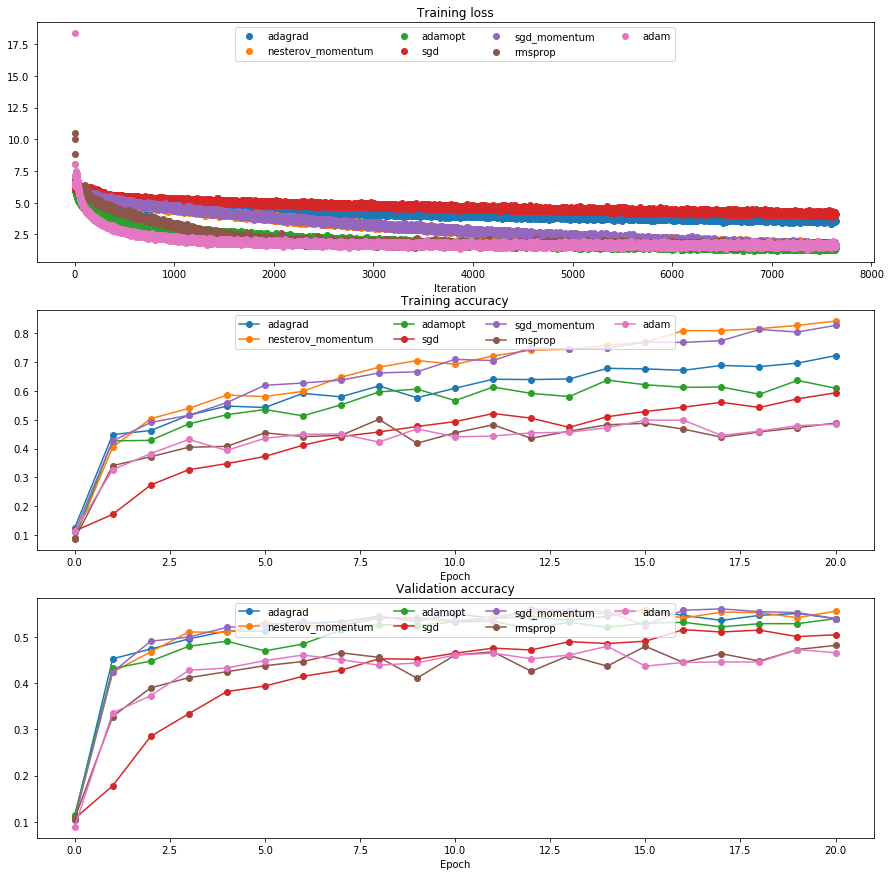

In [25]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [26]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.55
